In [93]:
import numpy as np

In [94]:
import time

In [95]:
import matplotlib.pyplot as plt

In [205]:
# Define parameter values
A=1
alpha=0.3
beta=0.5

In [165]:
n_k=1001

In [120]:
delta_values=[0.1,1]

In [121]:
#Define our tolerance
toler = 1e-5

In [122]:
# Define the utility function
def u(c):
    return np.log(c)

In [167]:
#Create initial guess for the value function
v_init=np.zeros(shape=(n_k,1))

In [124]:
max_iter=10000

In [168]:
policy=np.zeros(shape=(n_k,1))

In [169]:
v1=np.zeros(shape=(n_k,1))

In [170]:
v=np.zeros(shape=(n_k,1))

In [45]:
def Tv(v, k, d):
    start_time = time.time()
    #Start with iteration 0
    iter = 0
    #We need to set an initial error
    error = toler+1 
    #While these two conditions are true, do this.
    while (toler<error) and (iter<max_iter):
    #We will use this vector to store the distance between the given value function and the new.
        distance=np.zeros(shape=(n_k,1)) 
        #That is, for each element of the capital grid, perform the following:
        for i in range(len(k)):
            #We need to set an initial value for vmax. As soon as we do something, this will update
            vmax = -np.inf
            #Fixing an element in the grid, calculate consumption and the value of selecting each feasible capital stock tomorrow
            for j in range(len(k)): 
                #Consumption
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                #remember that c must be nonnegative
                if c>=0: 
                    #calculate the value using the consumption from above, and the current element j of the value function, which represents the value of having that capital stock tomorrow.
                    v_temp = u(c)+beta*v[j] 
                    #if the choice j' is better than j, then
                    if v_temp>vmax: 
                        #set j' as the new best choice
                        vmax=v_temp 
                        #and set that choice j' as the policy for element i of the capital stock
                        policy_i=k[j]
                #Now, once we have found vmax for a given i, set element i of the new value function to be that value 
                v1[i]=vmax 
                #Find the new policy function by setting element i to be the best choice j'
                policy[i]=policy_i 
                #new distance
                distance[i]=np.abs(vmax-v[i]) 
        #set new error
        error=np.max(distance) 
        #set v as the new calculation v1       
        v=np.copy(v1) 

        if iter % 10 == 0:
            #print Iteration number and error size every 10 iterations
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1

    if iter == max_iter:
        #if we don't converge, let me know
        print("Failed to converge in max_iter iterations") 
    # Record end time
    end_time = time.time() 
    #how long did it take? 
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    #give me the value fuction and the policy function
    return v, policy 


iterating for delta = 0.1:
Iteration 0, Max Error: 1.1232072887624076
Iteration 10, Max Error: 0.04176385139900285
Iteration 20, Max Error: 0.012747005199580164
Iteration 30, Max Error: 0.00437760859227132
Iteration 40, Max Error: 0.0015233414879607388
Iteration 50, Max Error: 0.0005311563337619951
Iteration 60, Max Error: 0.00018520276190547857
Iteration 70, Max Error: 6.457621012345705e-05
Iteration 80, Max Error: 2.251633221361793e-05
Execution time: 8.658876895904541 seconds


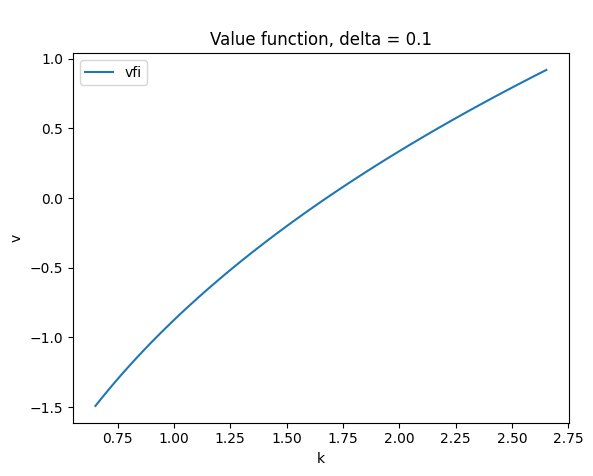

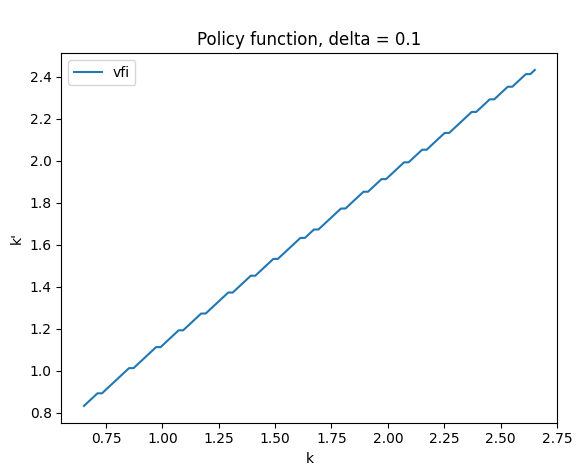

0.15405029000464884

iterating for delta = 1:
Iteration 0, Max Error: 0.8791561541275547
Iteration 10, Max Error: 0.30631368110421064
Iteration 20, Max Error: 0.10680497650870713
Iteration 30, Max Error: 0.037240592603975387
Iteration 40, Max Error: 0.012984991737553742
Iteration 50, Max Error: 0.004527586663762406
Iteration 60, Max Error: 0.001578671855339664
Iteration 70, Max Error: 0.0005504488399523666
Iteration 80, Max Error: 0.00019192964287029213
Iteration 90, Max Error: 6.692172848765665e-05
Iteration 100, Max Error: 2.3334163902433147e-05
Execution time: 8.38795518875122 seconds


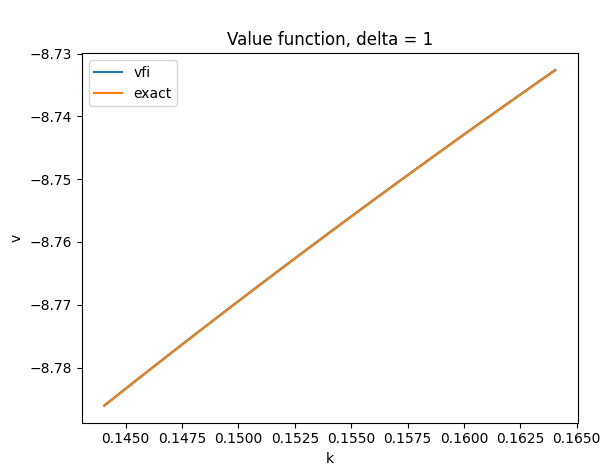

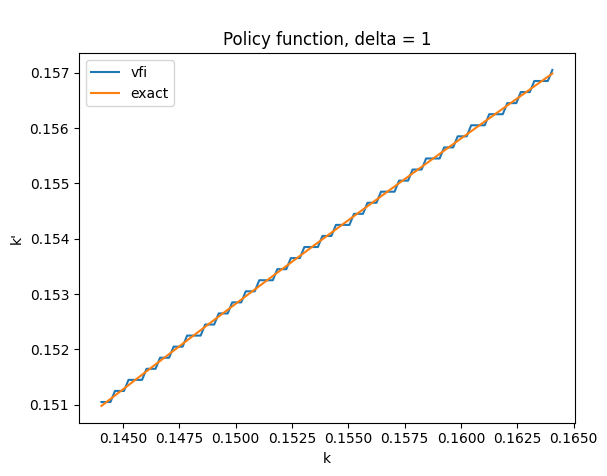

In [49]:
for delta in delta_values:
    if delta == 1:
        K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
        print(K_ss)
        K_grid = np.linspace(K_ss-1e-2, K_ss+1e-2, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv(v_init, K_grid, delta)
        a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
        + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
        a1 = alpha / (1 - alpha * beta)
        plt.plot(K_grid, final_v, label='vfi')
        plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(K_grid, final_policy, label='vfi')
        plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()
    else:
        K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
        K_grid = np.linspace(K_ss-1, K_ss+1, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv(v_init, K_grid, delta)
        plt.plot(K_grid, final_v, label='vfi')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(K_grid, final_policy, label='vfi')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()



In [116]:
m_values=[5,10,25,100,500]

In [54]:
def Tv_howard_changed(v, k, m, d):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax
        v2=v1.copy()
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i] 
                v2[i]=u(c)+beta*v1[j]
            v1=v2.copy()           
        for i in range(len(k)):
            distance[i]=np.abs(v1[i]-v[i]) 
        error=np.max(distance) 
        v=np.copy(v1)
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}")
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 


iterating for m = 5:

iterating for delta = 0.1:
Iteration 0, Max Error: 0.962066305452874
Iteration 10, Max Error: 0.000304882351790714
Execution time: 1.6991369724273682 seconds


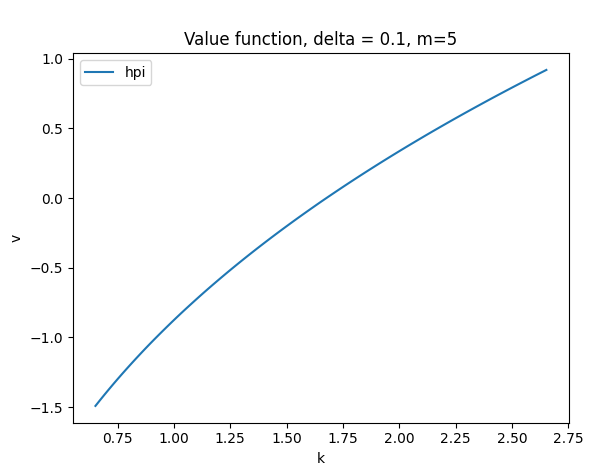

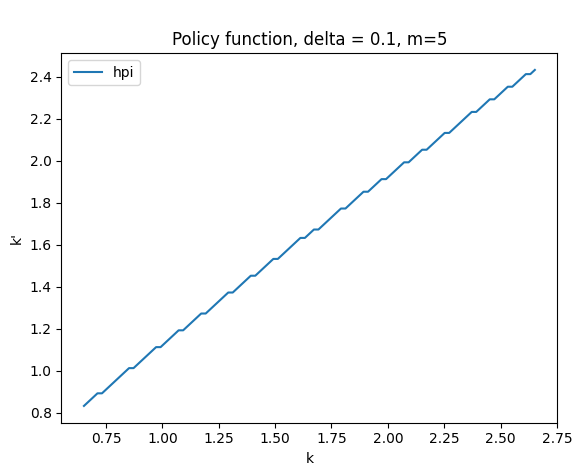


iterating for delta = 1:
Iteration 0, Max Error: 4.752480582502894
Iteration 10, Max Error: 0.0068578187245496025
Iteration 20, Max Error: 1.2323570885541812e-05
Execution time: 2.334591865539551 seconds


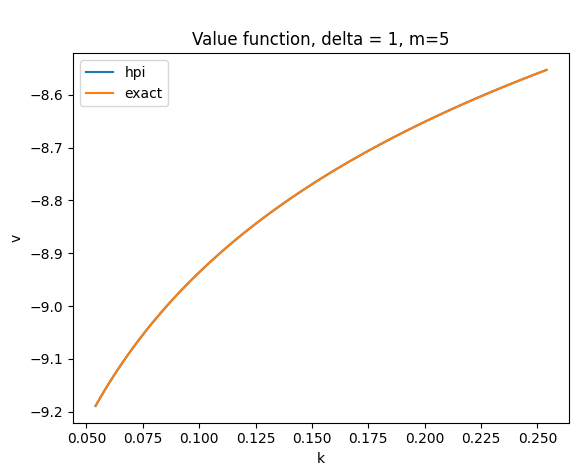

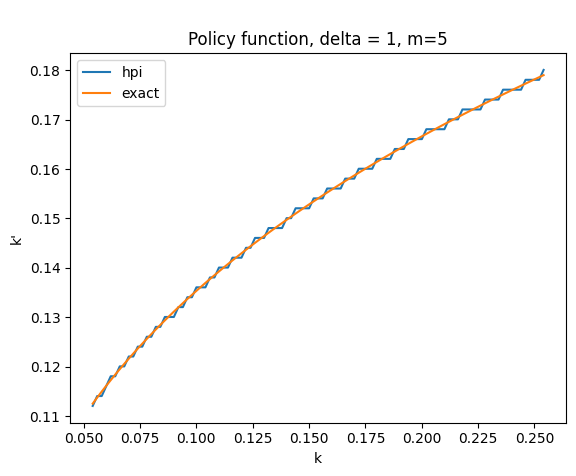


iterating for m = 10:

iterating for delta = 0.1:
Iteration 0, Max Error: 1.4089147890886817
Iteration 10, Max Error: 7.975994303754952e-05
Execution time: 1.2214453220367432 seconds


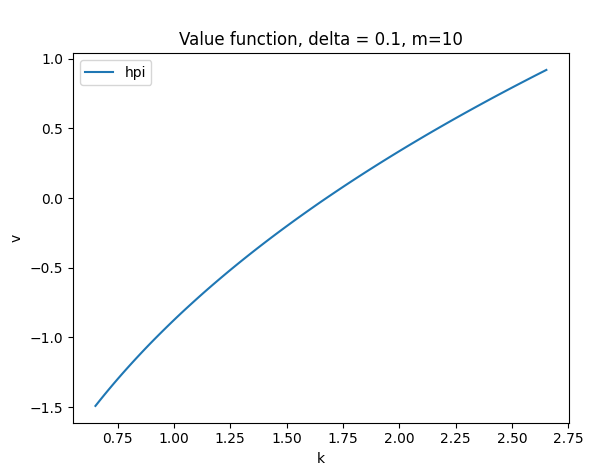

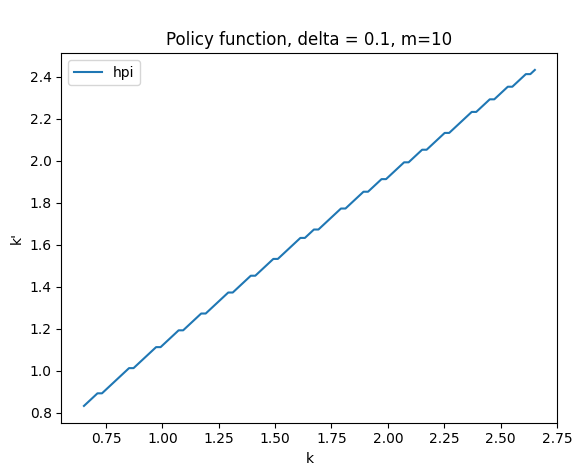


iterating for delta = 1:
Iteration 0, Max Error: 6.959853119887807
Iteration 10, Max Error: 4.1504189592700413e-05
Execution time: 1.4465680122375488 seconds


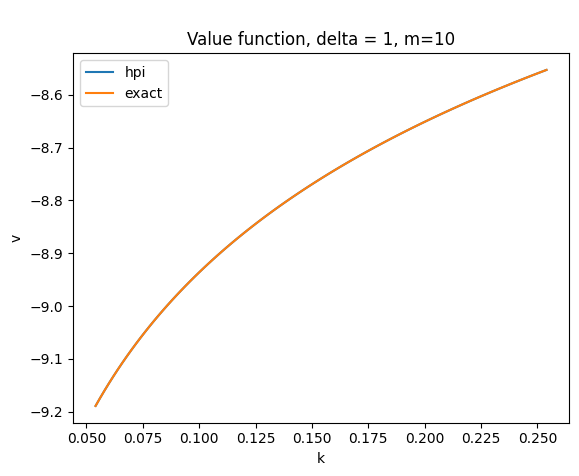

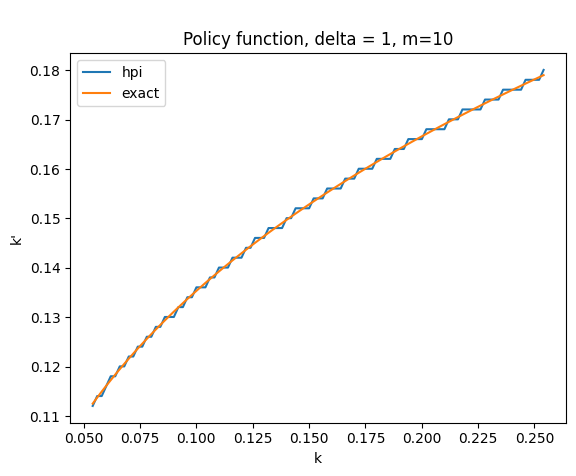


iterating for m = 25:

iterating for delta = 0.1:
Iteration 0, Max Error: 1.9205829225965276
Iteration 10, Max Error: 5.0830264666901215e-05
Execution time: 0.948378324508667 seconds


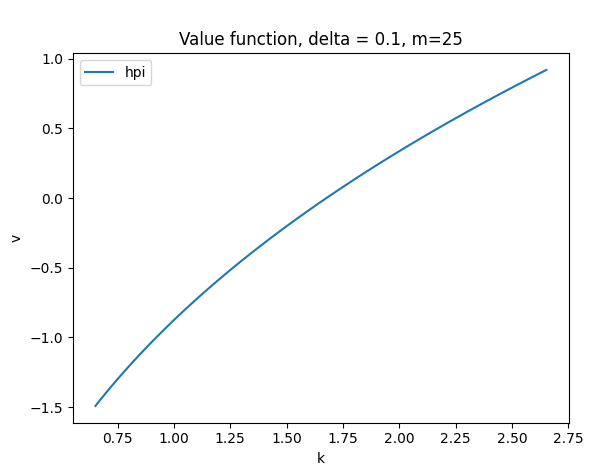

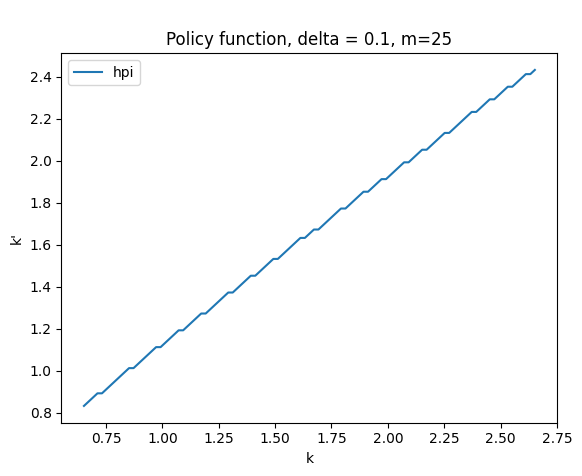


iterating for delta = 1:
Iteration 0, Max Error: 9.487426173219987
Execution time: 0.7026398181915283 seconds


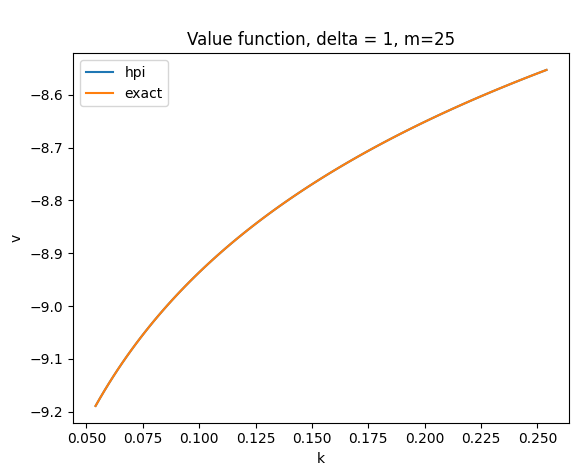

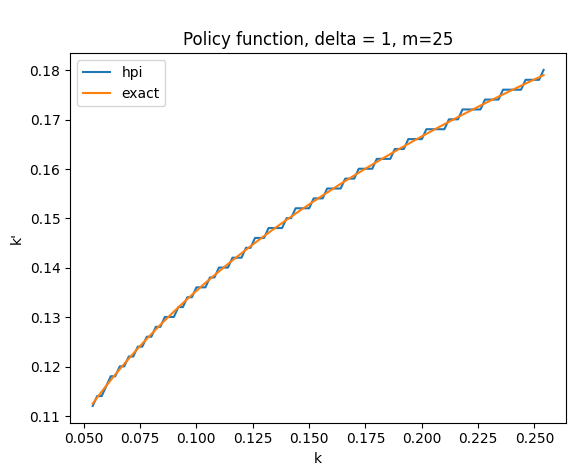


iterating for m = 100:

iterating for delta = 0.1:
Iteration 0, Max Error: 2.0531956637449458
Iteration 10, Max Error: 2.1710672941654963e-06
Execution time: 1.4219660758972168 seconds


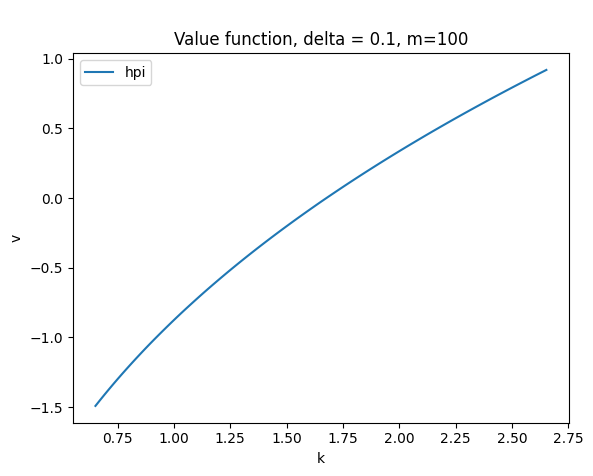

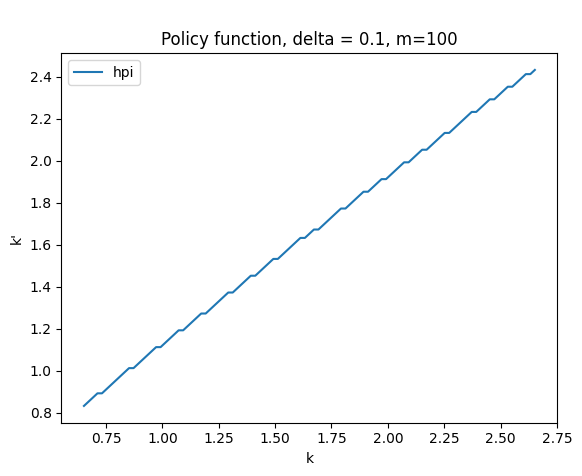


iterating for delta = 1:
Iteration 0, Max Error: 10.142515613239059
Execution time: 1.2331485748291016 seconds


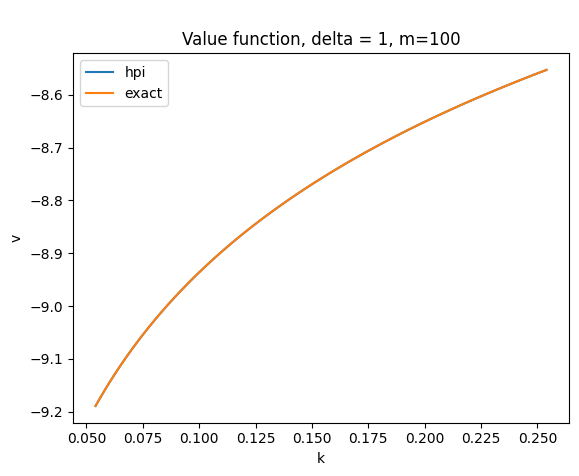

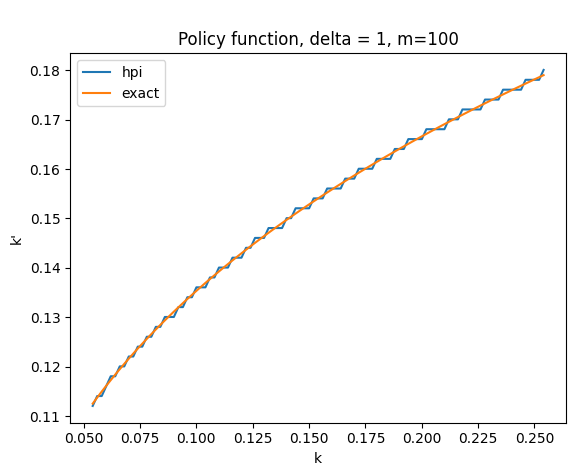


iterating for m = 500:

iterating for delta = 0.1:
Iteration 0, Max Error: 2.0532447470924104
Iteration 10, Max Error: 2.1710672941654963e-06
Execution time: 4.914396286010742 seconds


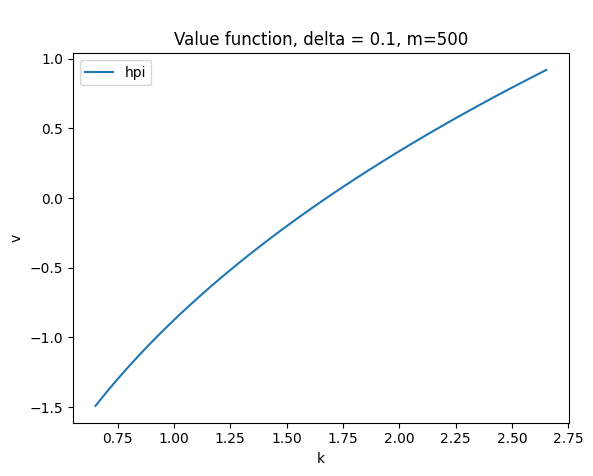

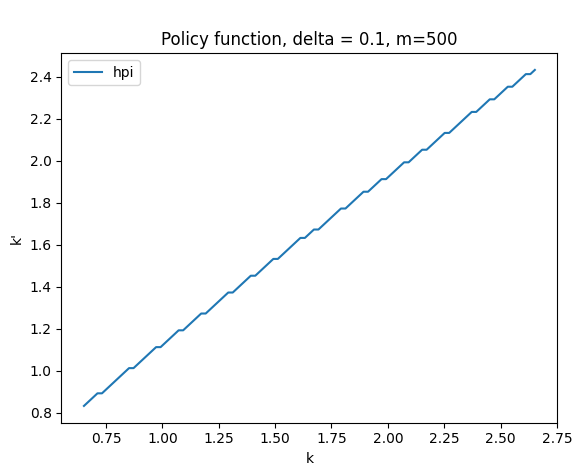


iterating for delta = 1:
Iteration 0, Max Error: 10.142758078497879
Execution time: 3.9957149028778076 seconds


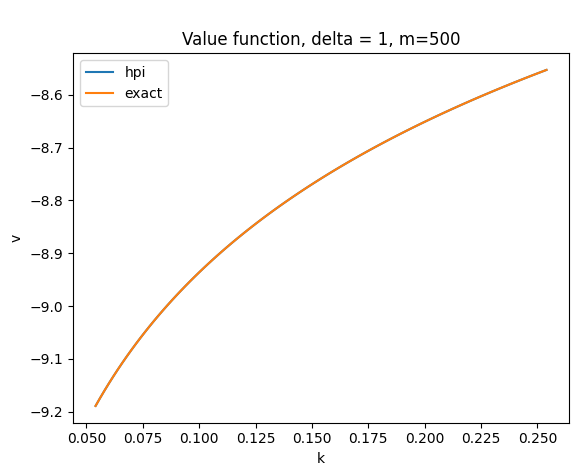

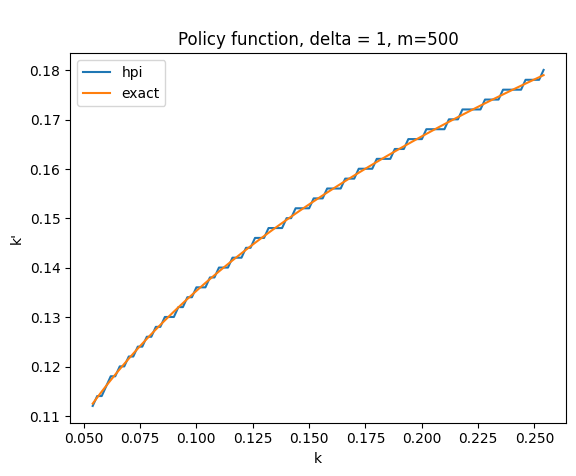

In [56]:
for m in m_values:
    print(f"\niterating for m = {m}:")
    for delta in delta_values:
        print(f"\niterating for delta = {delta}:")
        if delta == 1:
            K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
            K_grid = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)
            final_v, final_policy = Tv_howard_changed(v_init, K_grid, m, delta)
            a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
            + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
            a1 = alpha / (1 - alpha * beta)
            plt.plot(K_grid, final_v, label='hpi')
            plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
            plt.title(f"\nValue function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("v")
            plt.legend()
            plt.show()
            plt.plot(K_grid, final_policy, label='hpi')
            plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
            plt.title(f"\nPolicy function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("k'")
            plt.legend()
            plt.show()
        else:
            K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))
            K_grid = np.linspace(K_ss-1, K_ss+1, n_k)
            final_v, final_policy = Tv_howard_changed(v_init, K_grid, m, delta)
            plt.plot(K_grid, final_v, label='hpi')
            plt.title(f"\nValue function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("v")
            plt.legend()
            plt.show()
            plt.plot(K_grid, final_policy, label='hpi')
            plt.title(f"\nPolicy function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("k'")
            plt.legend()
            plt.show()

In [1]:
def Tv_bounds(v, k, bnd, d, m):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    v3=np.zeros(shape=(n_k,1))
    v4=np.zeros(shape=(n_k,1))
    v5=np.zeros(shape=(n_k,1))
    vect_c=np.zeros(shape=(n_k,1))
    distance=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-delta) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax     
        v2=np.copy(v1)
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i]
                v2[i]=u(c)+beta*v1[j]
            v1=np.copy(v2)
        v4=np.copy(v1)
        if iter % bnd == 0:
            for i in range(len(c)):           
                vect_c[i] = v4[i] - v[i]
            c_low = (beta / (1 - beta)) * np.min(vect_c)
            c_high = (beta / (1 - beta)) * np.max(vect_c)
            for i in range(len(k)):
                v5[i]=v4[i]+(c_low+c_high)/2
            v=np.copy(v5)
            error=c_high-c_low
        else:
            for i in range(len(k)):
                distance[i]=np.abs(v4[i]-v[i])
            v=np.copy(v4) 
            error=np.max(distance) 
        if iter % 1 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [105]:
out_v, out_pol = Tv_bounds(v_init, K_grid, 1, 1, 5)

Iteration 0, Max Error: 6.800435379167521
Iteration 10, Max Error: 0.006379866284116353
Execution time: 84.64394426345825 seconds


In [212]:
def Tv_vfi_bound(v, k, d, bnd, beta):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    v3=np.zeros(shape=(n_k,1))
    v4=np.zeros(shape=(n_k,1))
    v5=np.zeros(shape=(n_k,1))
    vect_c=np.zeros(shape=(n_k,1))
    c_high = 0
    c_low = 0
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax
        #for _ in range(m):
        #    for i in range(len(k)):
        #        j=idx[i]
        #        c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i] 
        #        v3[i]=u(c)+beta*v1[j]
        #    v1=v3.copy()
        #v4=v1.copy()
        if iter % bnd == 0:
            for i in range(len(k)):           
                vect_c[i] = np.abs(v1[i] - v[i])
            c_low = (beta / (1 - beta)) * np.min(vect_c)
            c_high = (beta / (1 - beta)) * np.max(vect_c)
            for i in range(len(k)):
                v2[i]=v1[i]+(c_low+c_high)/2
            v=v2.copy()
            error=c_high-c_low
        else:
            for i in range(len(k)):
                distance[i]=np.abs(v4[i]-v[i])
            v=v1.copy() 
            error=np.max(distance) 
        if iter % 1 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [198]:
def Tv_howard_bound(v, k, m, d, bnd):
    start_time = time.time()
    iter = 0 
    error = toler+1
    idx=np.zeros(shape=(n_k,1), dtype=int)
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    v3=np.zeros(shape=(n_k,1))
    v4=np.zeros(shape=(n_k,1))
    v5=np.zeros(shape=(n_k,1))
    vect_c=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j]
                        idx[i]=j
                v1[i]=vmax
        for _ in range(m):
            for i in range(len(k)):
                j=idx[i]
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i] 
                v3[i]=u(c)+beta*v1[j]
            v1=v3.copy()
        v4=v1.copy()
        if iter % bnd == 0:
            for i in range(len(k)):           
                vect_c[i] = np.abs(v4[i] - v[i])
            c_low = (beta / (1 - beta)) * np.min(vect_c)
            c_high = (beta / (1 - beta)) * np.max(vect_c)
            for i in range(len(k)):
                v5[i]=v4[i]+(c_low+c_high)/2
            #v=v1.copy()
            v=v5.copy()
            error=c_high-c_low
        else:
            for i in range(len(k)):
                distance[i]=np.abs(v4[i]-v[i])
            v=v4.copy() 
            error=np.max(distance) 
        if iter % 1 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [115]:
bnd_vals=[1,3,5]

In [59]:
for bnd in bnd_vals:
    print(f"\niterating for bnd = {bnd}:")
    for m in m_values:
        print(f"\niterating for m = {m}:")
        for delta in delta_values:
            print(f"\niterating for delta = {delta}:")
            if delta == 1:
                K_tilde = ( A / delta ) ** (1/1-alpha)
                K_grid = np.linspace(1e-2 , K_tilde-1e-5, n_k)
                final_v, final_policy = Tv_bounds(v_init, K_grid, bnd, delta, m)
                a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
                + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
                a1 = alpha / (1 - alpha * beta)
                plt.plot(K_grid, final_v, label='hpi')
                plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()
            else:
                K_tilde = ( A / delta ) ** (1/1-alpha)
                K_grid = np.linspace(1e-2 , K_tilde-1e-5, n_k)
                final_v, final_policy = Tv_bounds(v_init, K_grid, bnd, delta, m)
                plt.plot(K_grid, final_v, label='hpi')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()


iterating for bnd = 1:

iterating for m = 5:

iterating for delta = 0.1:


NameError: name 'Tv_bounds' is not defined


iterating for bnd = 1:

iterating for m = 5:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.11131019463837077
Iteration 2, Max Error: 0.0026087710922229057
Iteration 3, Max Error: 2.6015790963285212e-05
Iteration 4, Max Error: 5.354837177229399e-06
Execution time: 28.99889850616455 seconds


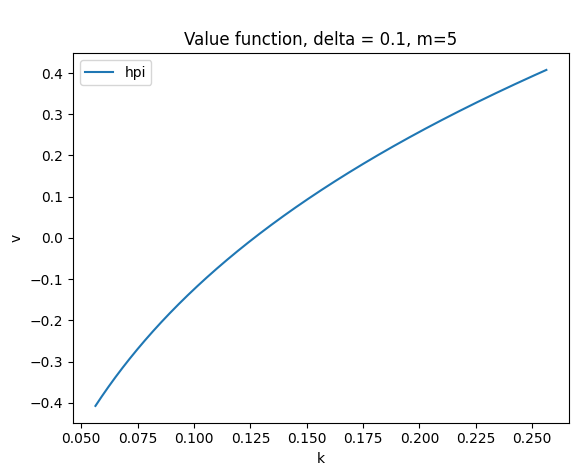

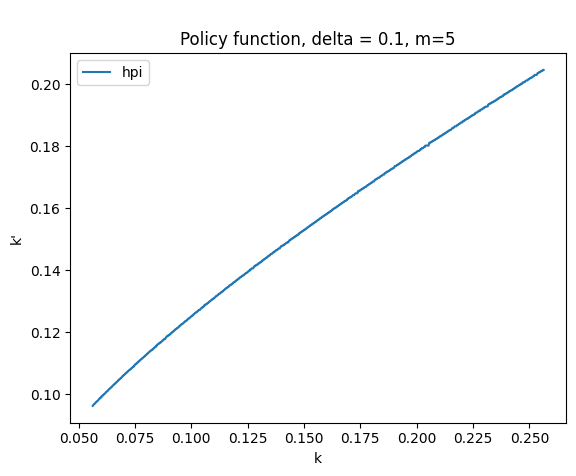


iterating for delta = 1:
0.06652540281931184
Iteration 0, Max Error: 0.31882182722521435
Iteration 1, Max Error: 0.024060536093152285
Iteration 2, Max Error: 0.0001109691393290646
Iteration 3, Max Error: 3.7747263006426834e-06
Execution time: 23.082934856414795 seconds


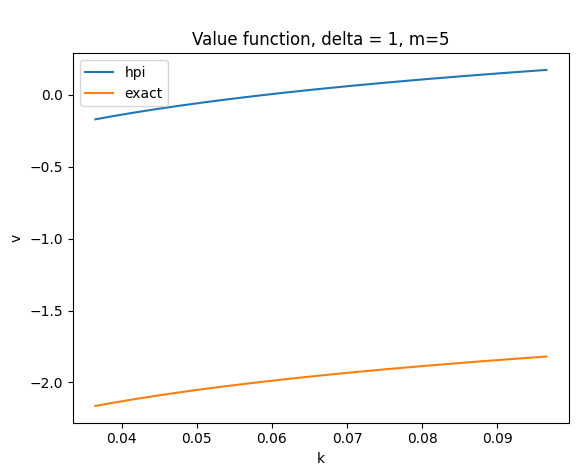

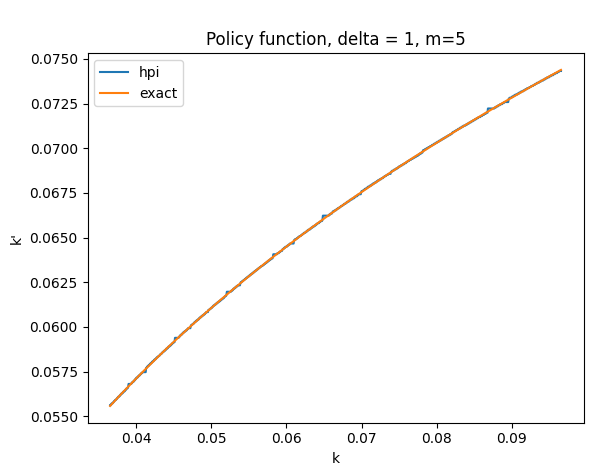


iterating for m = 10:

iterating for delta = 0.1:
0.15627804026698733
Iteration 0, Max Error: 0.7011866833504339
Iteration 1, Max Error: 0.1113297261414754
Iteration 2, Max Error: 0.002590038396298233
Iteration 3, Max Error: 2.599669822300754e-05


KeyboardInterrupt: 

In [208]:
for bnd in bnd_vals:
    print(f"\niterating for bnd = {bnd}:")
    for m in m_values:
        print(f"\niterating for m = {m}:")
        for delta in delta_values:
            print(f"\niterating for delta = {delta}:")
            if delta == 1:
                #print(beta) using beta = 0.9 here
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-3e-2, K_ss+3e-2, n_k)
                final_v, final_policy = Tv_howard_bound(v_init, K_grid, m, delta, bnd)
                a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
                + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
                a1 = alpha / (1 - alpha * beta)
                plt.plot(K_grid, final_v, label='hpi')
                plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()
            else:
                #print(beta) using beta = 0.9 here
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)
                final_v, final_policy = Tv_howard_bound(v_init, K_grid, m, delta, bnd)
                plt.plot(K_grid, final_v, label='hpi')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()

In [209]:
beta_vals=[0.9]

In [213]:
for bnd in bnd_vals:
    print(f"\niterating for bnd = {bnd}:")
    for beta in beta_vals:
        print(f"\niterating for beta = {beta}:")
        for delta in delta_values:
            print(f"\niterating for delta = {delta}:")
            if delta == 1:
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)
                final_v, final_policy = Tv_vfi_bound(v_init, K_grid, delta, bnd, beta)
                a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
                + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
                a1 = alpha / (1 - alpha * beta)  
                plt.plot(K_grid, final_v, label='hpi')
                plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()
            else:
                K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta))) ** (1/(1 - alpha))
                print(K_ss)
                #Make sure to change the grid scale!
                K_grid = np.linspace(K_ss-1, K_ss+1, n_k)
                final_v, final_policy = Tv_vfi_bound(v_init, K_grid, delta, bnd, beta)
                plt.plot(K_grid, final_v, label='hpi')
                plt.title(f"\nValue function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("v")
                plt.legend()
                plt.show()
                plt.plot(K_grid, final_policy, label='hpi')
                plt.title(f"\nPolicy function, delta = {delta}, m={m}")
                plt.xlabel('k')
                plt.ylabel("k'")
                plt.legend()
                plt.show()


iterating for bnd = 1:

iterating for beta = 0.9:

iterating for delta = 0.1:
1.6520170257619573
Iteration 0, Max Error: 10.10211204982107
Iteration 1, Max Error: 3.679976482978374
Iteration 2, Max Error: 2.0122034523853554
Iteration 3, Max Error: 1.261094875339852
Iteration 4, Max Error: 0.8381899188990936
Iteration 5, Max Error: 0.5737040919886454
Iteration 6, Max Error: 0.39917097199835894
Iteration 7, Max Error: 0.2804598920102137
Iteration 8, Max Error: 0.19829658892064117
Iteration 9, Max Error: 0.1408235992861364
Iteration 10, Max Error: 0.10024497356471329
Iteration 11, Max Error: 0.07153096319120777
Iteration 12, Max Error: 0.05109891444863024
Iteration 13, Max Error: 0.03655367649298569
Iteration 14, Max Error: 0.026152234329856583
Iteration 15, Max Error: 0.018733845972747076
Iteration 16, Max Error: 0.013401195388723863
Iteration 17, Max Error: 0.00961280320188962
Iteration 18, Max Error: 0.006887663519592024
Iteration 19, Max Error: 0.004942454426782206
Iteration 20, Max 

KeyboardInterrupt: 

Now, we attempt to take advantage of the power of broadcasting in NumPy by vectorising our code.

In [83]:
def Tv_vec(delt, max_iteration, grid_size, A, alph, bet, toler):

    #K_max = ( A / delt ) ** (1/(1-alph))

    K_ss = (( alph * bet * A) / (1 - bet * (1 - delt)))** (1/(1 - alph))
    
    k = np.linspace(K_ss-1e-2, K_ss+1e-2, grid_size).reshape(-1,1)

    #k = np.linspace(1e-5, K_max, grid_size).reshape(-1,1)

    v = np.zeros(shape=(grid_size,1))

    policy=np.zeros(shape=(grid_size,1))

    #valid_indices=np.zeros(shape=(grid_size,1))

    start_time=time.time()

    iter = 0

    error=toler+1

    while (toler < error) and (iter < max_iteration):
        
        distance = np.zeros(shape=(grid_size,1))

        # Now, take advantage of broadcasting
        # First, calculate consumption. This code will produce a matrix of size (grid_size, grid_size)
        # where element (i,j) corresponds to consumption for capital i today and capital j tomorrow.

        #c = A * k[:, np.newaxis] ** 1-alph + ( 1 - delt ) * k[:, np.newaxis] - k

        c = A * k ** (alph) + ( 1 - delt ) * k - k.T
        #print(c)
        #print(c.shape)

        # In principle, the above code could allow for negative consumption. We prevent that next.y
        # For np.where(condition, x, y) means that x will be applied when the condition is true, and y when false

        c_pos = np.where(c>=0, c, np.nan)
        #print(c_pos)

        # Below, u is applied element-wise to c_pos, creating an (grid_size, grid_size) vector
        # as v it (grid_size, 1), we add it to each column of u(c_pos). This is what we mean by broadcasting.
        # So, v_temp_i,j = u(c)_i,j + beta * v_j.

        v_temp = u(c_pos) + bet * v
        #print(v_temp.shape)
        #print(v_temp)

        # Now, we maximise over the rows, since each row corresponds to a different current capital stock.
        # That is, for a given i, look at each column and pick the best

        vmax = np.nanmax(v_temp, axis=1)[:, np.newaxis]

        #print(vmax.shape)
        #print(vmax)

        # Similarly, find the policy function
        #valid_indices=np.where(np.isnan(v_temp))

        #policy=k[valid_indices[1][np.argmax(v_temp[valid_indices])]]
        policy = np.argmax(v_temp, axis=1)

        #print(policy)
        # Update value function and calculate distance

        v1 = vmax
        #print(v1)

        distance = np.abs(v1 - v)

        error = np.max(distance)

        v=np.copy(v1)

        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}")
        
        iter +=1

    if iter == max_iteration:
        print("Failed to converge in max_iter iterations")

    end_time = time.time()

    execution_time = end_time - start_time

    print(f"Execution time: {execution_time} seconds")

    return v, policy

In [84]:
v_vec, pol_vec = Tv_vec(1, 10000 , 101, 0.5, 0.3, 0.5, 1e-5)
print(v_vec)
print(pol_vec)

Iteration 0, Max Error: 2.0690244742925805
Iteration 10, Max Error: 0.00202053171317651
Execution time: 0.007619619369506836 seconds
[[-4.13804106]
 [-4.12899903]
 [-4.12008162]
 [-4.11128547]
 [-4.10260737]
 [-4.09404421]
 [-4.08559304]
 [-4.07725098]
 [-4.0690153 ]
 [-4.06088333]
 [-4.05285252]
 [-4.04492043]
 [-4.03708467]
 [-4.02934295]
 [-4.02169308]
 [-4.01413292]
 [-4.00666041]
 [-3.99927356]
 [-3.99197046]
 [-3.98474924]
 [-3.97760811]
 [-3.97054533]
 [-3.96355921]
 [-3.95664813]
 [-3.94981051]
 [-3.94304482]
 [-3.93634957]
 [-3.92972334]
 [-3.92316472]
 [-3.91667236]
 [-3.91024495]
 [-3.90388123]
 [-3.89757994]
 [-3.89133989]
 [-3.88515992]
 [-3.87903888]
 [-3.87297568]
 [-3.86696924]
 [-3.86101853]
 [-3.85512252]
 [-3.84928023]
 [-3.8434907 ]
 [-3.83775299]
 [-3.8320662 ]
 [-3.82642944]
 [-3.82084184]
 [-3.81530256]
 [-3.80981077]
 [-3.80436569]
 [-3.79896653]
 [-3.79361253]
 [-3.78830295]
 [-3.78303706]
 [-3.77781416]
 [-3.77263355]
 [-3.76749457]
 [-3.76239656]
 [-3.7573388

C:\Users\bayle\AppData\Local\Temp\ipykernel_5052\2126697831.py:16: RuntimeWarning: invalid value encountered in log
  plt.plot(k, a0 + a1 * np.log(k), label = 'verify')


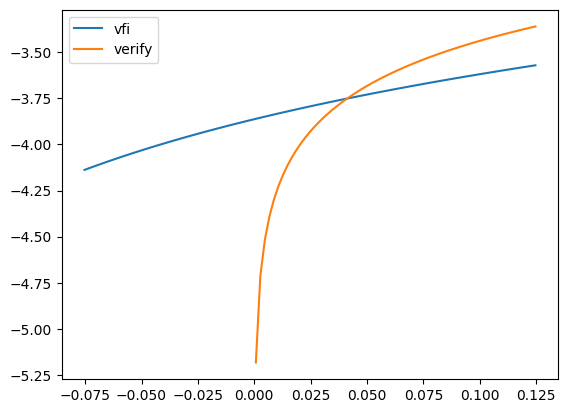

C:\Users\bayle\AppData\Local\Temp\ipykernel_5052\2126697831.py:21: RuntimeWarning: invalid value encountered in power
  plt.plot(k, A * beta * alpha * k ** alpha, label = 'verify')


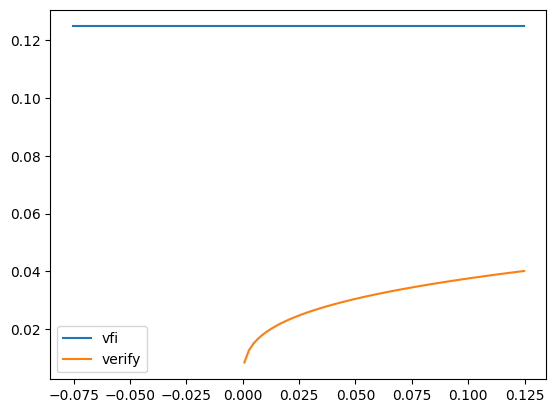

In [85]:
A = 0.5
delta = 1
beta = 0.5
alpha = 0.3
size=1001

K_ss = (( alpha * beta * A) / (1 - beta * (1 - delta)))** (1/(1 - alpha))

k = np.linspace(K_ss-1e-1, K_ss+1e-1, n_k)

a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))

a1 = alpha / (1 - alpha * beta)

plt.plot(k, v_vec, label = 'vfi')
plt.plot(k, a0 + a1 * np.log(k), label = 'verify')
plt.legend()
plt.show()

plt.plot(k, k[pol_vec], label = 'vfi')
plt.plot(k, A * beta * alpha * k ** alpha, label = 'verify')
plt.legend()
plt.show()